# Polynomial interpolation

Polynomial interpolation is the method of finding a polynomial that matches a function at specific points in its range. Mathematically speaking, if $f(x)$ is a function on the interval $[a,b]$ and $p(x)$ is a polynomial, then $p(x)$ interpolates the function $f(x)$ at the points $x_0, x_1, \ldots, x_n$ if $p(x_i) = f(x_i)$ for all $i = 0,1,\ldots,n$. We will be mainly studying functions that are smooth. 

## Lagrange interpolation

Given a set $\left\{x_i\right\}_{i=1}^n$ of $n$ points to interpolate a family of $n$ basis functions with the following property is constructed:
    $$L_j(x_i) = \begin{cases}0, & \text{if } i\neq j\\ 1, & \text{if } i=j \end{cases}.$$
A Lagrange polynomial is defined as the following basis expansion: 
    $$p(x) = \sum_{j=0}^{n} y_{j} L_{j}(x) \tag{1}$$
where the set of basis functions 
    $$L_{j}(x) = \prod_{k=1, k \ne j}^n \frac{x-x_{k}}{x_{j}-x_{k}}. \tag{2}$$
Why is this allowed? Because 
    $$p(x_j) = \sum_{j=0}^{n} y_{j} L_{j}(x_j) = \sum_{j=0}^{n} y_{j} \delta_{kj} = y_j,$$
which is our primary goal.

In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [4]:
def lagrange_basis(j, x, xs): # jth Lagrange basis function
    '''
    This is an implementation of Equation (2).
    
    j = identifies the order of the basis function
    xs = interpolating points or nodes
    x = a scalar or array of x-coordinates
    points = an array of lists
    
    '''    
    
    L_j = 1 # intialize L_j
    for k in range(0, len(xs)):
        if k == j: # skips the jth index
            continue
        else:
            L_j *= (x - xs[k])/ (xs[j] - xs[k])

    return L_j


def lagrange_interpolation(xs,ys, x):
    '''
    This is an implementation of Equation (1).
    
    points: each row is a a tuple (x,y)
    xs,ys: points used for interpolation (the nodes)
    '''
    p = 0
    for j in range(0, len(xs)):
        p += ys[j] * lagrange_basis(j, x, xs)
        
    return p

### First example

<IPython.core.display.Javascript object>


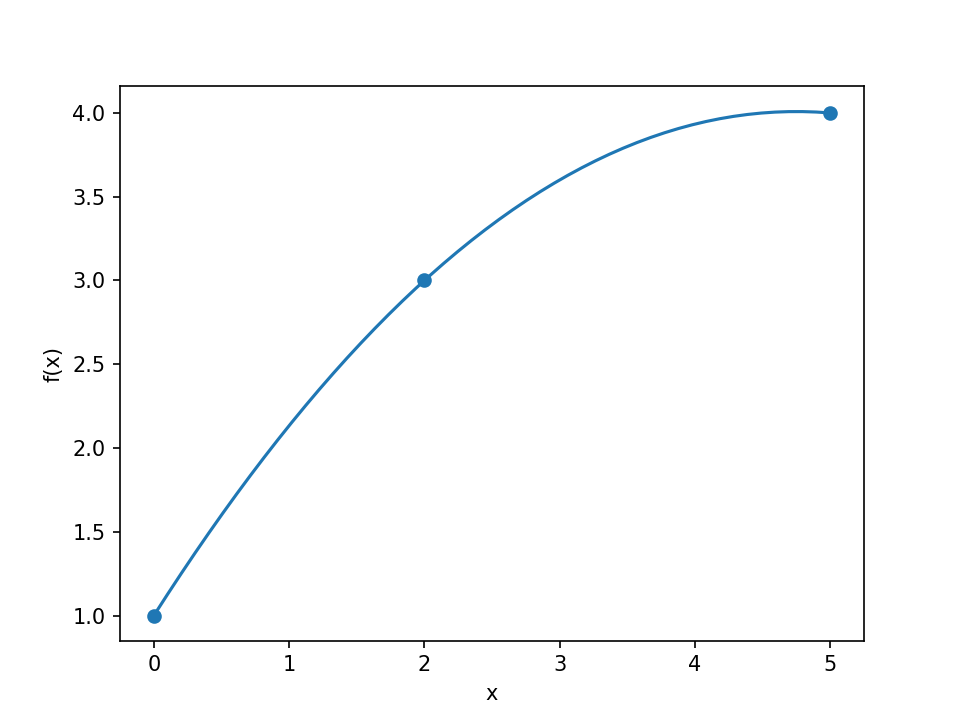

Text(0, 0.5, 'f(x)')

In [5]:
# Given data
xs = [0, 2, 5]
ys = [1, 3, 4]

# Interpolation step
x = np.linspace(np.min(xs),np.max(xs))
f = lagrange_interpolation(xs, ys, x)

# Plot
plt.figure()
plt.scatter(xs, ys)
plt.plot(x, f)
plt.xlabel("x")
plt.ylabel("f(x)")

### Second example

<IPython.core.display.Javascript object>


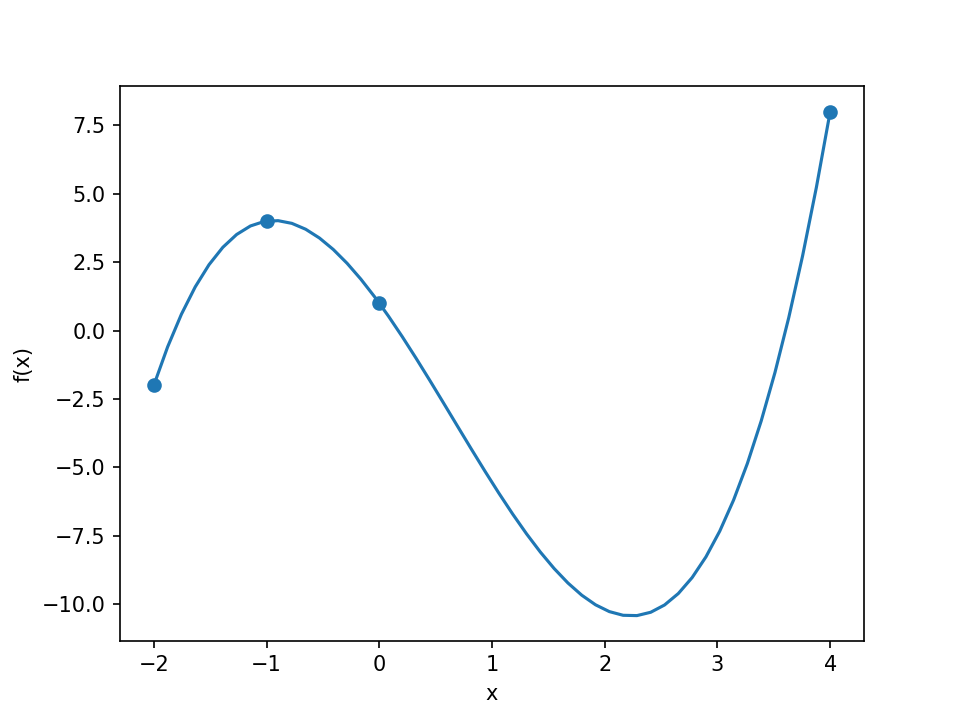

Text(0, 0.5, 'f(x)')

In [6]:
# Given data
xs = [-2, -1, 0, 4]
ys = [-2, 4, 1, 8]

# Interpolation step
x = np.linspace(np.min(xs),np.max(xs))
f = lagrange_interpolation(xs, ys, x)

# Plot
plt.figure()
plt.scatter(xs, ys)
plt.plot(x, f)
plt.xlabel("x")
plt.ylabel("f(x)")

# Runge's function

## Evenly-spaced interpolating points

In [8]:
# Runge's function
runges_fxn = lambda x: 1 / (1 + 25*x**2)

<IPython.core.display.Javascript object>


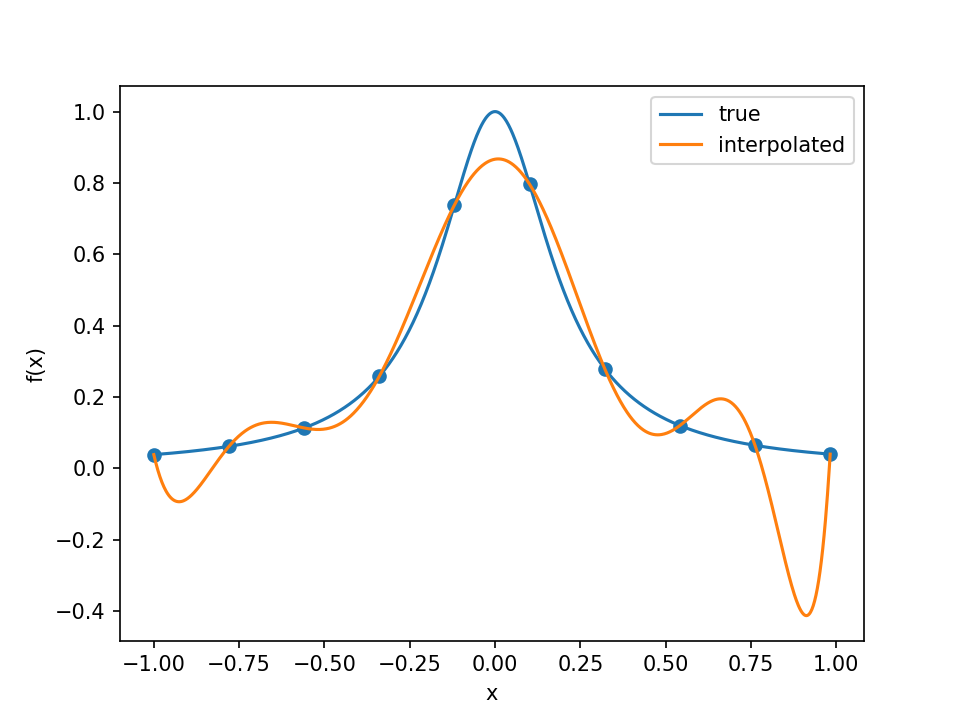

In [10]:
# Get interpolating points
xs = np.linspace(-1,1,1000)[::110]
ys = runges_fxn(xs)

# Interpolation step
x = np.linspace(np.min(xs),np.max(xs),1000)
runges_fxn_interpolated = lagrange_interpolation(xs, ys, x)

# Plot
plt.figure()
plt.scatter(xs, ys)
plt.plot(x, runges_fxn(x), label="true")
plt.plot(x, runges_fxn_interpolated, label="interpolated")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

## Randomly choosing the interpolating points

<IPython.core.display.Javascript object>


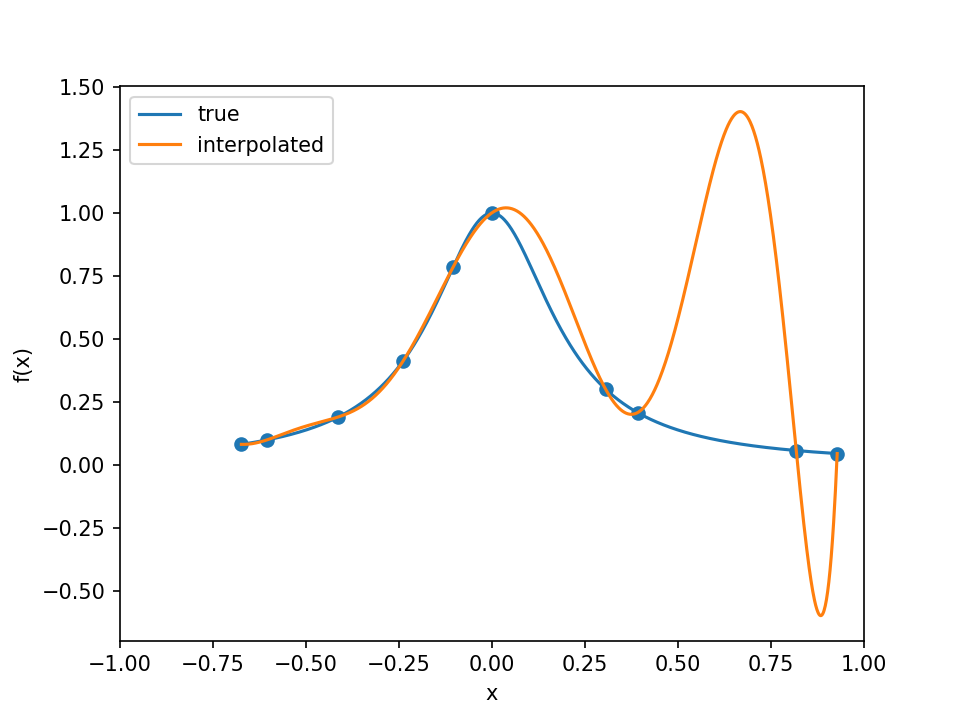

In [17]:
import random

# Choose interpolating points randomly
xs = np.zeros(10)

for i in range(0, len(xs)):
    xs[i] = random.choice(np.linspace(-1,1,1000))
    
xs = np.sort(xs)
ys = runges_fxn(xs)

# Interpolation step
x = np.linspace(np.min(xs),np.max(xs),1000)
runges_fxn_interpolated = lagrange_interpolation(xs, ys, x)

# Plot
plt.figure()
plt.scatter(xs, ys)
plt.plot(x, runges_fxn(x), label="true")
plt.plot(x, runges_fxn_interpolated, label="interpolated")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(-1,1)
plt.legend()

Lagrange interpolation has a couple of drawbacks. The most glaring issue is its instability when a large number of interpolating points are used.

# Barycentric Lagrange Interpolation

In vanilla Lagrange interpolation, a Lagrange polynomial is
    $$$$

# Chebyshev Nodes